<a href="https://colab.research.google.com/github/neel-save/Projects/blob/master/Pandas_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas_datareader as pdp
import datetime as dt

In [0]:
start = dt.datetime(2010,1,1)
start = start.strftime('%m-%d-%Y')
end = dt.datetime(2020,1,31)
end = end.strftime('%m-%d-%Y')

tickers = ['AAPL','TSLA','COST','SPY','MSFT']

In [0]:
Index = pdp.DataReader("^GSPC", 'yahoo',start, end)
Index.rename(columns={'Adj Close':'S&P'},inplace=True)
df=Index[['S&P']]

In [0]:
for i in tickers:
    SP = pdp.get_data_yahoo(i, start, end)
    
    
    
    SP.rename(columns={"Adj Close":i} ,inplace=True)
    SP=SP[[i]]
    df = df.merge(SP,on='Date')

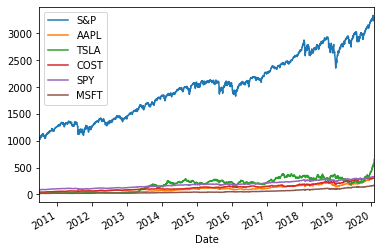

In [0]:
df.plot()

In [0]:
stocks = df.iloc[:,1:]
index = df.iloc[:,0]

In [0]:
daily_returns = stocks.pct_change()
mean_daily_returns = daily_returns.mean()
annualize_returns = mean_daily_returns*250

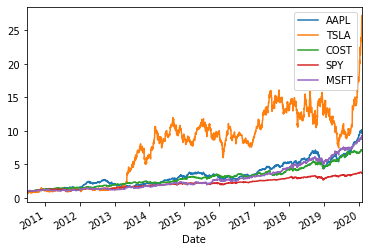

In [0]:
# daily returns cumulative 
cumulative_daily_returns = (1+daily_returns).cumprod()
cumulative_daily_returns.plot()

In [0]:
annualize_returns

AAPL    0.267757
TSLA    0.473472
COST    0.218005
SPY     0.146774
MSFT    0.255228
dtype: float64

In [0]:
# Covariance of daily returns 
covariance_matrix = daily_returns.cov()*250
covariance_matrix

,AAPL,TSLA,COST,SPY,MSFT
AAPL,0.064130,0.031826,0.013862,0.021104,0.025577
TSLA,0.031826,0.264427,0.016769,0.026262,0.029674
COST,0.013862,0.016769,0.031865,0.014310,0.015824
SPY,0.021104,0.026262,0.014310,0.020353,0.022214
MSFT,0.025577,0.029674,0.015824,0.022214,0.050808


In [0]:
# Standard Deviation 
standard_deviation = daily_returns.std()
print(standard_deviation)
annualize_standard_deviation = standard_deviation*np.sqrt(250)
print(annualize_standard_deviation)

AAPL    0.016016
TSLA    0.032522
COST    0.011290
SPY     0.009023
MSFT    0.014256
dtype: float64
AAPL    0.253238
TSLA    0.514224
COST    0.178509
SPY     0.142665
MSFT    0.225405
dtype: float64


In [0]:
portfolio = pd.concat([annualize_returns,annualize_standard_deviation],axis=1)
portfolio.columns=['Return','Volatility']

In [0]:
portfolio

,Return,Volatility
AAPL,0.267757,0.253238
TSLA,0.473472,0.514224
COST,0.218005,0.178509
SPY,0.146774,0.142665
MSFT,0.255228,0.225405


In [0]:
no_of_portfolios = 2000
number_of_assets = len(tickers)
weight_asset =[]
portfolio_return = []
portfolio_variance =[]

risk_free = 0.02
for portfolio in range(no_of_portfolios):
    wt = np.random.random(number_of_assets)
    asset_weight = wt/sum(wt)
    weight_asset.append(asset_weight)
    returns = np.dot(asset_weight,annualize_returns)
    portfolio_return.append(returns)
    variance = (np.dot(asset_weight.T,np.dot(covariance_matrix,asset_weight)))*np.sqrt(250)
    portfolio_variance.append(variance)
    
final =pd.DataFrame()
final['Portfolio Return'] = portfolio_return
final['Portfolio Variance']=portfolio_variance
final['Sharpe Ratio'] = (final['Portfolio Return']-risk_free)/final['Portfolio Variance']


In [0]:
portfolio_return

[0.2870032799310263,
 0.22898277307688764,
 0.25938945503051636,
 0.2788985542321656,
 0.29567544961407644,
 0.3291032881181855,
 0.29207815053587444,
 0.2734106476424453,
 0.26703304864484373,
 0.24928871126856433,
 0.2240919629960296,
 0.23878737300323377,
 0.2858482870930578,
 0.28190014819942943,
 0.2238276476980524,
 0.2840012084505495,
 0.23075802346107954,
 0.2834116098138242,
 0.2494179950228707,
 0.26993390547850477,
 0.2568242341687763,
 0.2322377583818257,
 0.28077401555454357,
 0.28582871747830596,
 0.21216746437741973,
 0.2256572507915626,
 0.258229865885196,
 0.260635069911833,
 0.2364956417238551,
 0.26543702445105355,
 0.22498085477228064,
 0.28426761742261036,
 0.2852665321318593,
 0.24789446109229618,
 0.28181713689045507,
 0.24027805471212288,
 0.35708596559956113,
 0.2807733296217695,
 0.26481357482467643,
 0.2602210576454774,
 0.27736186360340304,
 0.24896033327415112,
 0.28134666704769307,
 0.2795796897345179,
 0.3069625017313199,
 0.21207023565669955,
 0.35310509

In [0]:
final

,Portfolio Return,Portfolio Variance,Sharpe Ratio
0,0.287003,0.823973,0.324044
1,0.228983,0.401777,0.520147
2,0.259389,0.484151,0.494452
3,0.278899,0.641671,0.403476
4,0.295675,0.684521,0.402728
...,...,...,...
1995,0.232055,0.400433,0.529564
1996,0.250318,0.449202,0.512728
1997,0.259186,0.497760,0.480523
1998,0.249239,0.511794,0.447913


In [0]:
for counter, symbol in enumerate(stocks.columns.tolist()):
    final[symbol+ ' weights'] = [w[counter] for w in weight_asset]

In [0]:
final

,Portfolio Return,Portfolio Variance,Sharpe Ratio,AAPL weights,TSLA weights,COST weights,SPY weights,MSFT weights
0,0.287003,0.823973,0.324044,0.003638,0.324142,0.020983,0.352510,0.298727
1,0.228983,0.401777,0.520147,0.313082,0.069212,0.262067,0.327492,0.028146
2,0.259389,0.484151,0.494452,0.319714,0.144363,0.273918,0.195054,0.066952
3,0.278899,0.641671,0.403476,0.141687,0.275701,0.346029,0.234147,0.002436
4,0.295675,0.684521,0.402728,0.239048,0.270469,0.220033,0.123420,0.147031
...,...,...,...,...,...,...,...,...
1995,0.232055,0.400433,0.529564,0.028128,0.130104,0.474294,0.315942,0.051532
1996,0.250318,0.449202,0.512728,0.223524,0.116308,0.193411,0.238757,0.228001
1997,0.259186,0.497760,0.480523,0.206529,0.149394,0.140913,0.239632,0.263533
1998,0.249239,0.511794,0.447913,0.395022,0.023277,0.113572,0.108712,0.359416


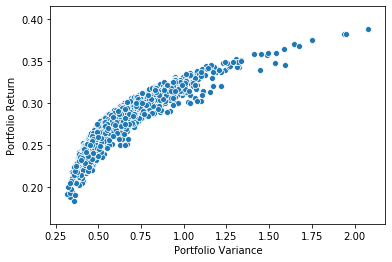

In [0]:
ax = sns.scatterplot(x="Portfolio Variance", y="Portfolio Return", data=final)

In [0]:
#Min Volatility portfolio

final[final['Portfolio Variance'] == final['Portfolio Variance'].min()]

,Portfolio Return,Portfolio Variance,Sharpe Ratio,AAPL weights,TSLA weights,COST weights,SPY weights,MSFT weights
695,0.192481,0.318892,0.540878,0.010256,0.034414,0.307057,0.543603,0.104669


In [0]:
# Max Sharpe ratio Portfolio
final[final['Sharpe Ratio'] == final['Sharpe Ratio'].max()]

,Portfolio Return,Portfolio Variance,Sharpe Ratio,AAPL weights,TSLA weights,COST weights,SPY weights,MSFT weights
261,0.22426,0.356133,0.573551,0.125943,0.039661,0.461865,0.221379,0.151152
